In [38]:
import jsonlines
import json
import polars as pl

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cbook as cbook

In [40]:
# lines contains all log lines
lines = []
with jsonlines.open('logs.jsonl') as reader:
    for log in reader:
        lines.append(json.JSONDecoder().decode(log['line']))
lines[:3]

[{'level': 30,
  'time': 1748944817778,
  'pid': 1,
  'clientAddress': '172.18.0.1',
  'method': 'POST',
  'url': 'https://enotaryo.crabdance.com/auth?/login',
  'signatoryId': '6580954839',
  'msg': 'login attempt'},
 {'level': 30,
  'time': 1748944818128,
  'pid': 1,
  'clientAddress': '172.18.0.1',
  'method': 'POST',
  'url': 'https://enotaryo.crabdance.com/auth?/login',
  'signatoryId': '6580954839',
  'msg': 'validation attempt'},
 {'level': 30,
  'time': 1748944818174,
  'pid': 1,
  'clientAddress': '172.18.0.1',
  'method': 'POST',
  'url': 'https://enotaryo.crabdance.com/auth?/login',
  'signatoryId': '6580954839',
  'msg': 'session generation attempt'}]

In [41]:
# lines containing all testing log lines
testing_lines = []
with jsonlines.open('tester_logs.jsonl') as reader:
    for log in reader:
        testing_lines.append(json.JSONDecoder().decode(log['line']))
testing_lines[:3]

[{'level': 40,
  'time': 1748944814949,
  'pid': 217259,
  'retry': 2,
  'msg': 'test retrying and truncating documents'},
 {'level': 30,
  'time': 1748944819587,
  'pid': 217259,
  'msg': 'logged into enotaryo'},
 {'level': 30,
  'time': 1748944820820,
  'pid': 217259,
  'start': '6:00:12 PM',
  'msg': 'navigating to document: a-0'}]

In [42]:
lines

[{'level': 30,
  'time': 1748944817778,
  'pid': 1,
  'clientAddress': '172.18.0.1',
  'method': 'POST',
  'url': 'https://enotaryo.crabdance.com/auth?/login',
  'signatoryId': '6580954839',
  'msg': 'login attempt'},
 {'level': 30,
  'time': 1748944818128,
  'pid': 1,
  'clientAddress': '172.18.0.1',
  'method': 'POST',
  'url': 'https://enotaryo.crabdance.com/auth?/login',
  'signatoryId': '6580954839',
  'msg': 'validation attempt'},
 {'level': 30,
  'time': 1748944818174,
  'pid': 1,
  'clientAddress': '172.18.0.1',
  'method': 'POST',
  'url': 'https://enotaryo.crabdance.com/auth?/login',
  'signatoryId': '6580954839',
  'msg': 'session generation attempt'},
 {'level': 30,
  'time': 1748944818924,
  'pid': 1,
  'clientAddress': '172.18.0.1',
  'method': 'GET',
  'url': 'https://enotaryo.crabdance.com/',
  'requestHandleTime': 0.10386199969798326},
 {'level': 30,
  'time': 1748944819275,
  'pid': 1,
  'clientAddress': '172.18.0.1',
  'method': 'GET',
  'url': 'https://enotaryo.crab

In [43]:
# get error messages

errors = []

with jsonlines.open('logs.jsonl') as reader:
    for log in reader:
        if log['labels']['level'] == 'error':
            errors.append(json.JSONDecoder().decode(log['line']))

errors

[{'level': 50,
  'time': 1748944828455,
  'pid': 1,
  'clientAddress': '172.18.0.1',
  'method': 'POST',
  'url': 'https://enotaryo.crabdance.com/document',
  'transaction': '01JWTKR78TTGPX6T9SR8DYZJGP',
  'signature': '6580954839',
  'reason': {'name': 'WebPushError',
   'message': 'Received unexpected response code',
   'statusCode': 404,
   'headers': {'content-security-policy-report-only': "script-src 'none'; form-action 'none'; frame-src 'none'; report-uri https://csp.withgoogle.com/csp/goa-520bfc14_2",
    'content-type': 'text/plain; charset=utf-8',
    'cross-origin-opener-policy': 'same-origin',
    'vary': 'Sec-Fetch-Site, Sec-Fetch-Mode, Sec-Fetch-Dest',
    'x-content-type-options': 'nosniff',
    'x-frame-options': 'SAMEORIGIN',
    'x-xss-protection': '0',
    'date': 'Tue, 03 Jun 2025 10:00:28 GMT',
    'content-length': '135',
    'alt-svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000'},
   'body': 'A valid push subscription endpoint should be specified in the URL a

In [44]:
webpush = 0
othererrs = []
for entry in errors:
    if entry.get('reason', None) is not None:
        webpush=webpush+1
    else:
        
        othererrs.append(entry)

webpush

7970

In [45]:
othererrs

[{'level': 50,
  'time': 1748977571111,
  'pid': 1,
  'clientAddress': '172.18.0.1',
  'method': 'POST',
  'url': 'https://enotaryo.crabdance.com/api/signature',
  'transaction': '01JWVJYD56QRSN7W2QS6AYYXXE',
  'e': {'name': 'PostgresError',
   'severity_local': 'ERROR',
   'severity': 'ERROR',
   'code': '23503',
   'detail': 'Key (document_id)=(b4a0e34c-7d15-46a4-ba60-9a9d50879723) is not present in table "document".',
   'schema_name': 'app',
   'table_name': 'signature',
   'constraint_name': 'signature_document_id_document_id_fk',
   'file': 'ri_triggers.c',
   'line': '2599',
   'routine': 'ri_ReportViolation'}},
 {'level': 50,
  'time': 1748977571159,
  'pid': 1,
  'clientAddress': '172.18.0.1',
  'method': 'POST',
  'url': 'https://enotaryo.crabdance.com/document',
  'transaction': '01JWVJYD56QRSN7W2QS6AYYXXE',
  'signature': '6580954839',
  'error': {'message': 'an internal server error occurred'},
  'msg': 'form action failed'},
 {'level': 50,
  'time': 1749013749185,
  'pid'

In [46]:
# routines contains all lines relevant to routines
routines = list(filter(lambda x: x.get('routine', None) is not None, lines))

routines[:3]

[{'level': 30,
  'time': 1748944822263,
  'pid': 1,
  'clientAddress': '172.18.0.1',
  'method': 'POST',
  'url': 'https://enotaryo.crabdance.com/api/document',
  'transaction': '01JWTKR78TTGPX6T9SR8DYZJGP',
  'routine': 'a3.1',
  'elapsedTime': 353.4659230001271,
  'msg': 'routine a3.1'},
 {'level': 30,
  'time': 1748944823523,
  'pid': 1,
  'clientAddress': '172.18.0.1',
  'method': 'POST',
  'url': 'https://enotaryo.crabdance.com/api/document',
  'transaction': '01JWTKR78TTGPX6T9SR8DYZJGP',
  'routine': 'a3.2',
  'elapsedTime': 1260.2793950000778,
  'msg': 'routine a3.2'},
 {'level': 30,
  'time': 1748944823524,
  'pid': 1,
  'clientAddress': '172.18.0.1',
  'method': 'POST',
  'url': 'https://enotaryo.crabdance.com/document',
  'transaction': '01JWTKR78TTGPX6T9SR8DYZJGP',
  'routine': 'a2',
  'elapsedTime': 1977.5284939999692,
  'msg': 'routine a2'}]

In [47]:
len(routines)

101235

In [59]:
routines

[{'level': 30,
  'time': 1748944822263,
  'pid': 1,
  'clientAddress': '172.18.0.1',
  'method': 'POST',
  'url': 'https://enotaryo.crabdance.com/api/document',
  'transaction': '01JWTKR78TTGPX6T9SR8DYZJGP',
  'routine': 'a3.1',
  'elapsedTime': 353.4659230001271,
  'msg': 'routine a3.1'},
 {'level': 30,
  'time': 1748944823523,
  'pid': 1,
  'clientAddress': '172.18.0.1',
  'method': 'POST',
  'url': 'https://enotaryo.crabdance.com/api/document',
  'transaction': '01JWTKR78TTGPX6T9SR8DYZJGP',
  'routine': 'a3.2',
  'elapsedTime': 1260.2793950000778,
  'msg': 'routine a3.2'},
 {'level': 30,
  'time': 1748944823524,
  'pid': 1,
  'clientAddress': '172.18.0.1',
  'method': 'POST',
  'url': 'https://enotaryo.crabdance.com/document',
  'transaction': '01JWTKR78TTGPX6T9SR8DYZJGP',
  'routine': 'a2',
  'elapsedTime': 1977.5284939999692,
  'msg': 'routine a2'},
 {'level': 30,
  'time': 1748944823966,
  'pid': 1,
  'clientAddress': '172.18.0.1',
  'method': 'POST',
  'url': 'https://enotaryo.c

In [49]:
# put all routine times into a dictionary
from collections import defaultdict

routine_times = defaultdict(list)

for routine in routines:
    routine_name = routine['routine']
    elapsed_time = routine['elapsedTime']
    routine_times[routine_name].append(elapsed_time)

routine_times = dict(routine_times)
routine_mean_times = [dict(routine_times)]

routine_key = sorted(list(routine_times.keys()))
routine_key

['a1',
 'a2',
 'a3.1',
 'a3.2',
 'a4',
 'a5',
 'a6',
 'a7',
 'a8',
 'a9',
 'b1',
 'b2',
 'b3',
 'b4',
 'b5.1',
 'b5.2',
 'c1',
 'c2',
 'c3',
 'c4',
 'c5',
 'd1']

In [64]:
txns = defaultdict(list)

for routine in routines:
    try:
        txn_ID = routine['transaction']
        routineID = routine['routine']
        txns[txn_ID].append(routineID)
    except:
        print(routine)

for transaction in txns:
    txns[transaction] = sorted(txns[transaction])

txns

{'level': 30, 'time': 1748995200694, 'pid': 1, 'cron': 'expire', 'routine': 'd1', 'elapsedTime': 175.9258849993348, 'msg': 'routine d1'}


defaultdict(list,
            {'01JWTKR78TTGPX6T9SR8DYZJGP': ['a1',
              'a2',
              'a3.1',
              'a3.2',
              'a4',
              'a5',
              'a6',
              'a7',
              'a8',
              'a9'],
             '01JWTKRFQZYN7HZ7BKT36E6RQ1': ['b1',
              'b2',
              'b3',
              'b4',
              'b5.1',
              'b5.2'],
             '01JWTKRNYVQG44RC4ZJWNH8RAA': ['a1',
              'a2',
              'a3.1',
              'a3.2',
              'a4',
              'a5',
              'a6',
              'a7',
              'a8',
              'a9'],
             '01JWTKRWWA56CEWNQ1GQ6KVG9Z': ['c1', 'c2', 'c3', 'c4', 'c5'],
             '01JWTKRZ7W7RJ5S26VYJR0A1V5': ['a1',
              'a2',
              'a3.1',
              'a3.2',
              'a4',
              'a5',
              'a6',
              'a7',
              'a8',
              'a9'],
             '01JWTKS55D357D2766EGF9586J': ['b1

In [71]:
len(txns)

13047

In [72]:
totalperRout = {'a':0, 'b':0, 'c':0}

for transaction in txns:
    totalperRout[txns[transaction][0][0]] += 1

totalperRout

{'a': 6566, 'b': 3256, 'c': 3225}

In [12]:
routineMeans = []
for key in routine_key:
    routineMeans.append(sum(routine_times[key]) / len(routine_times[key]))

routineMeans

[2398.840700691092,
 1979.9734275101375,
 353.84816171258444,
 1264.4041078082296,
 404.22299710851183,
 709.9249867946673,
 353.88543278942825,
 2279.193735422834,
 862.8310877154906,
 359.10067229424874,
 2406.4609226914727,
 2406.2459930393143,
 351.79977596467415,
 1348.5590681182416,
 351.9734163096426,
 351.75827928623914,
 1413.2690654843357,
 706.774821978301,
 353.49960049612247,
 705.6000357615601,
 352.65642991494025,
 175.9258849993348]

C:\Users\jaman\AppData\Local\Temp\ipykernel_23808\1660679338.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


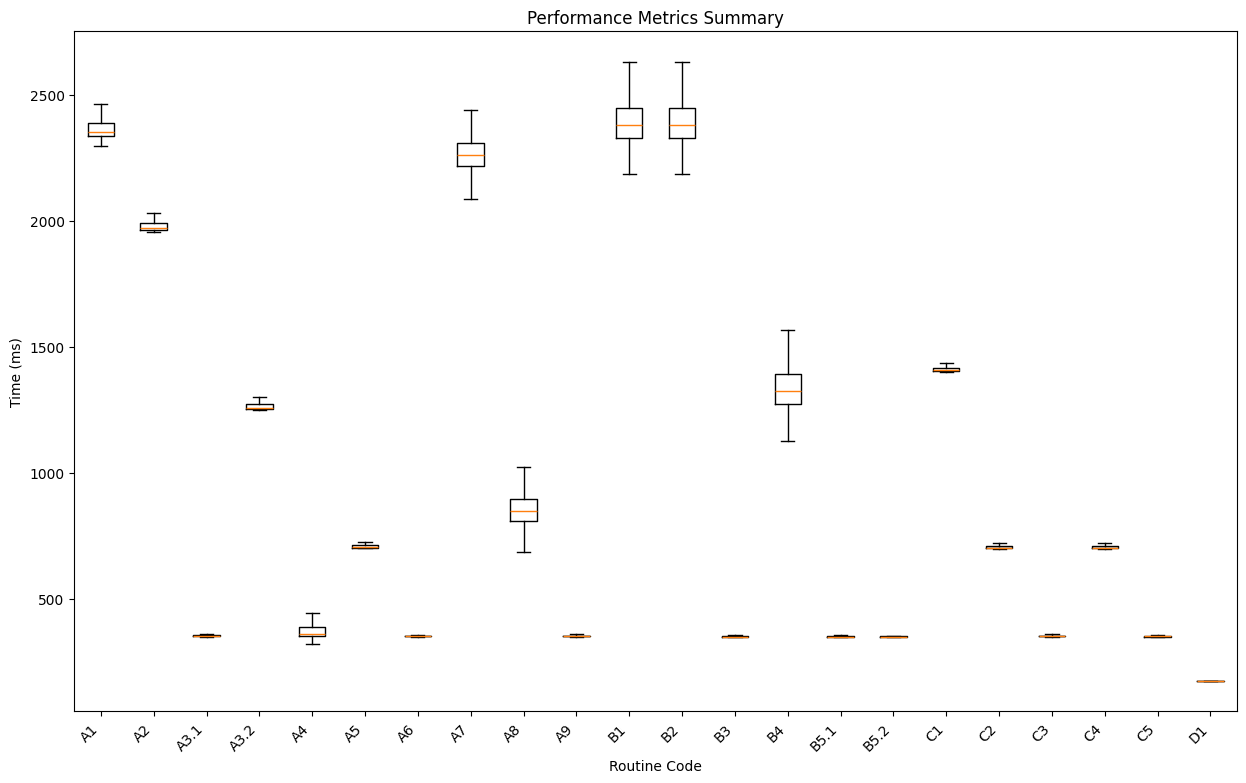

In [13]:
data = []
labels = []
for key in routine_key:
    data.append(routine_times[key])
    labels.append(key.upper())

fig, ax = plt.subplots(figsize = (15, 10))
stats = cbook.boxplot_stats(data, labels=labels)
ax.bxp(stats, showfliers=False)
ax.set_xlabel('Routine Code')
ax.set_ylabel('Time (ms)')

fig.autofmt_xdate(rotation=45)
plt.title('Performance Metrics Summary')


fig.show()


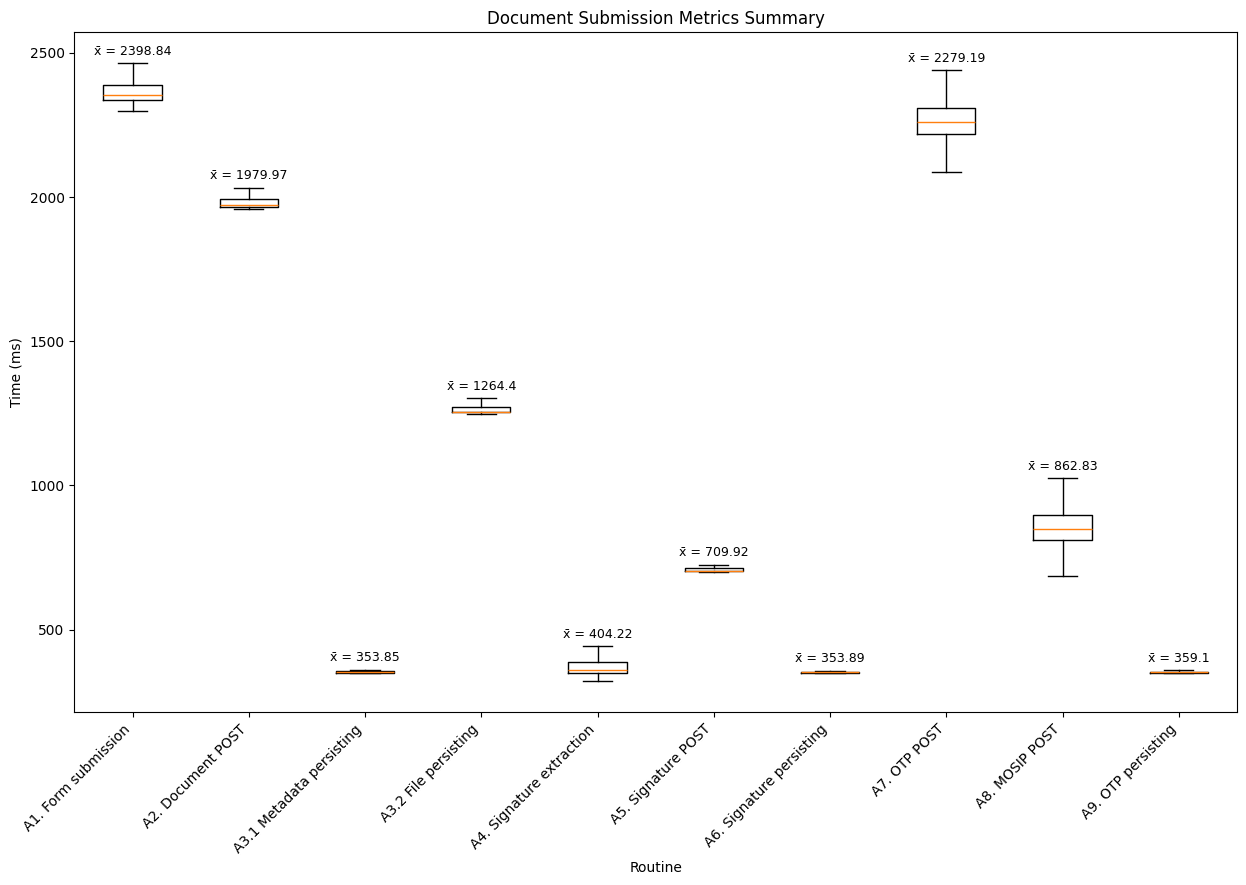

In [15]:
labels=[
    "A1. Form submission",
    "A2. Document POST",
    "A3.1 Metadata persisting", 
    "A3.2 File persisting",
    "A4. Signature extraction",
    "A5. Signature POST",
    "A6. Signature persisting",
    "A7. OTP POST",
    "A8. MOSIP POST",
    "A9. OTP persisting"
]

fig, ax = plt.subplots(figsize = (15, 10))
stats = cbook.boxplot_stats(data[:10], labels=labels)
ax.bxp(stats, showfliers=False)
ax.set_title('Document Submission Metrics Summary')
ax.set_xlabel('Routine')
ax.set_ylabel('Time (ms)')

upper =[]
for i in range(len(stats)):
    upper.append(stats[i]['whishi'])


routineMeans1 = routineMeans[:10]
for i, v in enumerate(routineMeans1):
    plt.text(i+1, upper[i]+30, "x\u0304 = "+str(round(float(v), 2)), ha = 'center', fontsize=9)

fig.autofmt_xdate(rotation=45)
plt.show()

[2398.840700691092, 1979.9734275101375, 353.84816171258444, 1264.4041078082296, 404.22299710851183, 709.9249867946673, 353.88543278942825, 2279.193735422834, 862.8310877154906, 359.10067229424874]


C:\Users\jaman\AppData\Local\Temp\ipykernel_23808\832285266.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


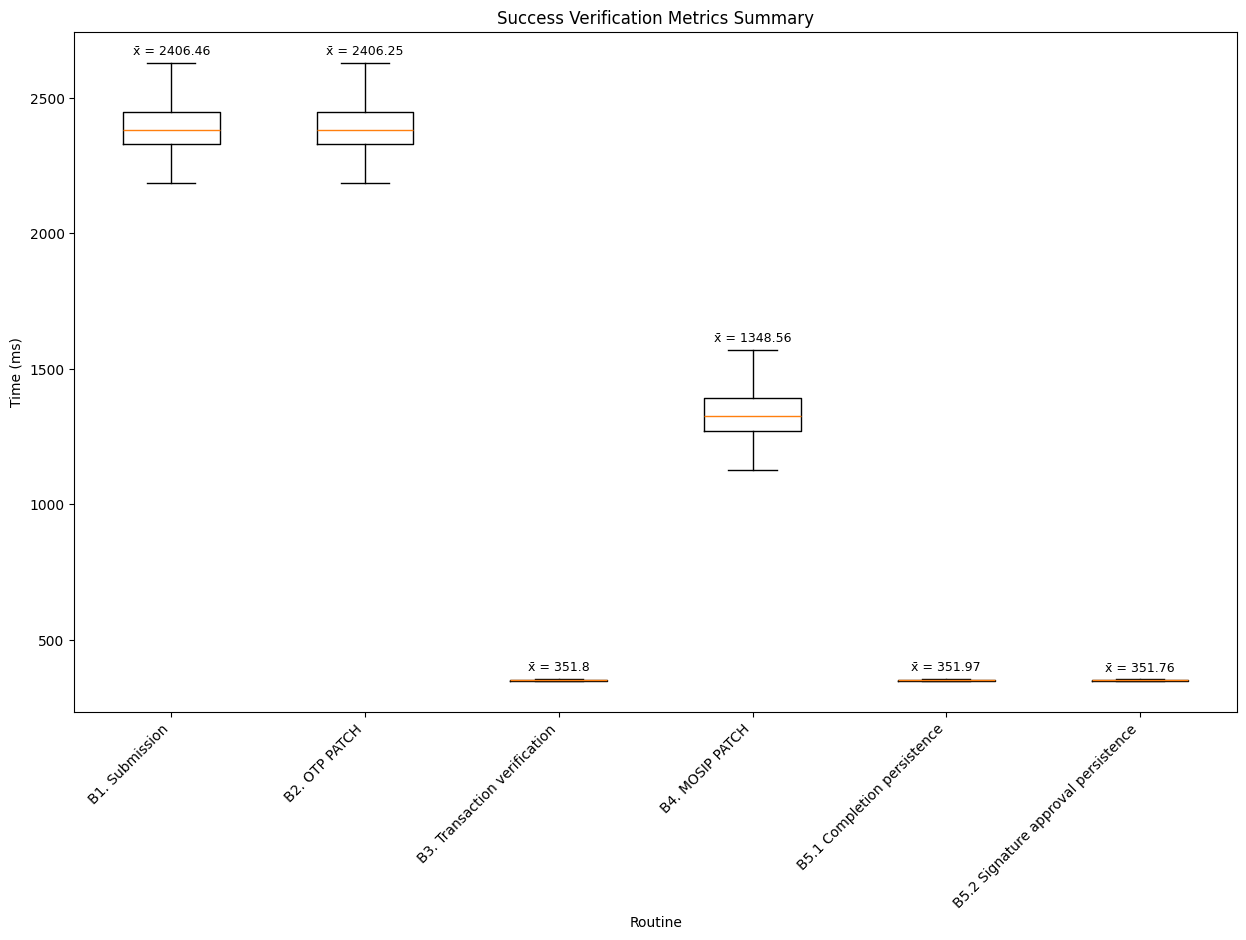

In [23]:
labels=[
    "B1. Submission",
    "B2. OTP PATCH",
    "B3. Transaction verification",
    "B4. MOSIP PATCH",
    "B5.1 Completion persistence",
    "B5.2 Signature approval persistence"
]

fig, ax = plt.subplots(figsize = (15, 10))
stats = cbook.boxplot_stats(data[10:16], labels=labels)
ax.bxp(stats, showfliers=False)
ax.set_title('Success Verification Metrics Summary')
ax.set_xlabel('Routine')
ax.set_ylabel('Time (ms)')

upper =[]
for i in range(len(stats)):
    upper.append(stats[i]['whishi'])

routineMeans2 = routineMeans[10:16]
print(routineMeans1)
for i, v in enumerate(routineMeans2):
    plt.text(i+1, upper[i]+30, "x\u0304 = "+str(round(float(v), 2)), ha = 'center', fontsize=9)

fig.autofmt_xdate(rotation=45)
fig.show()

C:\Users\jaman\AppData\Local\Temp\ipykernel_23808\4166359215.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


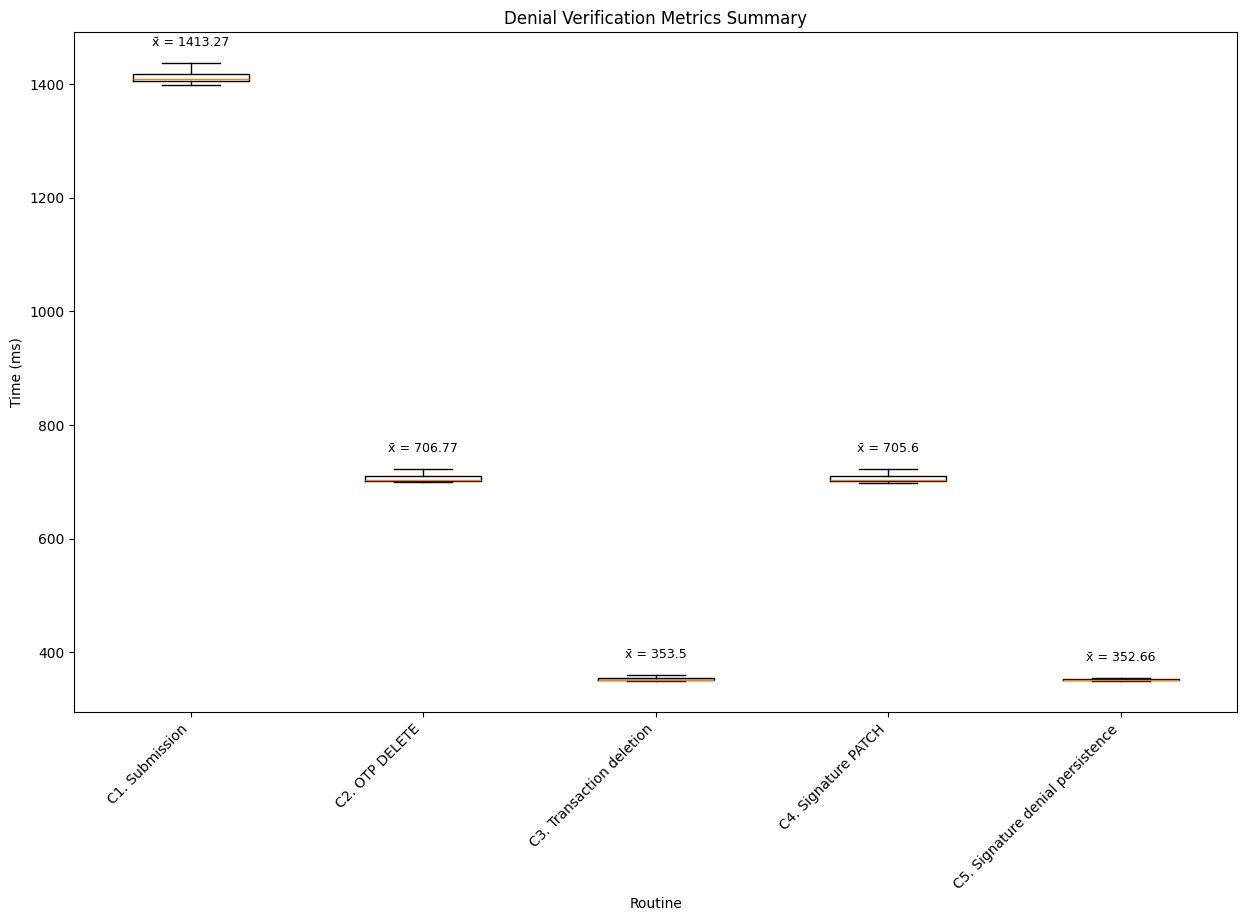

In [17]:
labels=[
    "C1. Submission",
    "C2. OTP DELETE",
    "C3. Transaction deletion",
    "C4. Signature PATCH",
    "C5. Signature denial persistence"
]

fig, ax = plt.subplots(figsize = (15, 10))
stats = cbook.boxplot_stats(data[16:21], labels=labels)
ax.bxp(stats, showfliers=False)
ax.set_title('Denial Verification Metrics Summary')
ax.set_xlabel('Routine')
ax.set_ylabel('Time (ms)')

upper =[]
for i in range(len(stats)):
    upper.append(stats[i]['whishi'])

routineMeans3 = routineMeans[16:21]
for i, v in enumerate(routineMeans3):
    plt.text(i+1, upper[i]+30, "x\u0304 = "+str(round(float(v), 2)), ha = 'center', fontsize=9)

fig.autofmt_xdate(rotation=45)
fig.show()

In [76]:
ARoutines = routine_key[:10]
BRoutines = routine_key[10:16]
CRoutines = routine_key[16:21]
incRouts = {'a':0, 'b':0, 'c':0}

errtxns = []

for transaction in txns:
    routCode = txns[transaction][0][0]

    if routCode == "a":
        if txns[transaction] != ARoutines:
            diff = list(filter(lambda x: x not in txns[transaction], ARoutines))
            incRouts['a'] += 1
            errtxns.append(transaction)
            print(transaction, diff)
            
    if routCode == "b":
        if txns[transaction] != BRoutines:
            diff = list(filter(lambda x: x not in txns[transaction], BRoutines))
            incRouts['b'] += 1
            errtxns.append(transaction)
            print(transaction, diff)

    if routCode == "c":
        if txns[transaction] != CRoutines:
            diff = list(filter(lambda x: x not in txns[transaction], CRoutines))
            incRouts ['c'] += 1
            errtxns.append(transaction)
            print(transaction, diff)

incRouts

01JWTQC35AESMK9TC28SVJ9HNA ['a7', 'a8', 'a9']
01JWTTS87591P8PTH6X1Q1YGZ2 ['c1', 'c4', 'c5']
01JWTY9GXK8NC842JXZ4RVWBRB ['b1', 'b5.1', 'b5.2']
01JWV1PNWBR6KPXCWCMW0PM1BH ['a7']
01JWV542VZQ0TB6RY9W984JVHT ['c1', 'c4', 'c5']
01JWV64RR8FH6XAR64FYJ3GQVT ['b5.1', 'b5.2']
01JWV6A7C82ECHACZ2C73M56M3 ['b5.1', 'b5.2']
01JWV8HZ4PVKT2M1ZMMJCD66MC ['a1', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9']
01JWVC2MVHXB0S4G96VRBYAE6H ['c1', 'c4', 'c5']
01JWVJYD56QRSN7W2QS6AYYXXE ['a3.1', 'a6', 'a7', 'a8', 'a9']
01JWVK8703Q650AMNCJH8VZ7TY ['a5', 'a6', 'a7', 'a8', 'a9']
01JWVPKRM4SM1DQGSZ9WRS1C51 ['a5', 'a6', 'a7', 'a8', 'a9']
01JWW0HCJ1Y640EEM4ANG7C06S ['a7', 'a8', 'a9']
01JWW40HPK7T7HV7X6HG91DBR3 ['a7', 'a9']
01JWW7J09R1RGRSEHZRXKGJMYQ ['a1', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9']
01JWWAXH65TFANDGNWV900YDW3 ['a1', 'a2', 'a3.2', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9']
01JWWEA0NRH46M4B4A0RHZZ0MJ ['a1', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9']
01JWWHX5TRNHZT1VWZ0JWZYW7J ['a7', 'a8', 'a9']
01JWWNERGQPHDNXZ4A0QV6PCJB ['a6', 'a7', 'a

{'a': 15, 'b': 4, 'c': 4}

In [ ]:
import datetime

errTimestamps = []

for transaction in errtxns:
    for routine in routines:
        try:
            if routine['transaction'] == transaction:
                errTimestamps.append(routine['time'])
        except:
            pass

for this in errTimestamps:
    date = datetime.datetime.fromtimestamp(this / 1e3)
    print(date)
    # results can be seen in errTimestamps.txt


2025-06-03 19:03:39.128000
2025-06-03 19:03:40.380000
2025-06-03 19:03:40.381000
2025-06-03 19:03:40.733000
2025-06-03 19:03:40.734000
2025-06-03 19:03:41.439000
2025-06-03 19:03:41.439000
2025-06-03 20:03:16.008000
2025-06-03 20:03:16.008000
2025-06-03 21:04:34.936000
2025-06-03 21:04:36.589000
2025-06-03 21:04:36.590000
2025-06-03 22:04:11.744000
2025-06-03 22:04:13.001000
2025-06-03 22:04:13.001000
2025-06-03 22:04:13.332000
2025-06-03 22:04:13.333000
2025-06-03 22:04:14.041000
2025-06-03 22:04:14.041000
2025-06-03 22:04:15.902000
2025-06-03 22:04:16.254000
2025-06-03 23:03:56.735000
2025-06-03 23:03:56.735000
2025-06-03 23:21:47.717000
2025-06-03 23:21:49.117000
2025-06-03 23:21:49.117000
2025-06-03 23:21:49.117000
2025-06-03 23:24:46.532000
2025-06-03 23:24:47.859000
2025-06-03 23:24:47.860000
2025-06-03 23:24:47.860000
2025-06-04 00:03:57.414000
2025-06-04 00:03:58.701000
2025-06-04 00:03:58.702000
2025-06-04 01:05:29.646000
2025-06-04 01:05:29.646000
2025-06-04 03:05:32.259000
2

In [18]:
# calculate average time for each routine

routineMeans = []
routine_mean_times = dict()
for key in routine_key:
    holder = []
    holder.append(sum(routine_times[key]) / len(routine_times[key]))
    routineMeans.append(sum(routine_times[key]) / len(routine_times[key]))
    routine_mean_times[key] = holder

routine_mean_times

{'a1': [2398.840700691092],
 'a2': [1979.9734275101375],
 'a3.1': [353.84816171258444],
 'a3.2': [1264.4041078082296],
 'a4': [404.22299710851183],
 'a5': [709.9249867946673],
 'a6': [353.88543278942825],
 'a7': [2279.193735422834],
 'a8': [862.8310877154906],
 'a9': [359.10067229424874],
 'b1': [2406.4609226914727],
 'b2': [2406.2459930393143],
 'b3': [351.79977596467415],
 'b4': [1348.5590681182416],
 'b5.1': [351.9734163096426],
 'b5.2': [351.75827928623914],
 'c1': [1413.2690654843357],
 'c2': [706.774821978301],
 'c3': [353.49960049612247],
 'c4': [705.6000357615601],
 'c5': [352.65642991494025],
 'd1': [175.9258849993348]}

In [19]:
routineNames = []
for i in range(len(routine_key)):
    routineNames.append(routine_key[i].upper())

pdNames = pd.Series(routineNames, name="Routine Code")
pdMeans = pd.Series(routineMeans, name="Avg. Elapsed Time")
df = pd.concat([pdNames, pdMeans], axis=1)
df



,Routine Code,Avg. Elapsed Time
0,A1,2398.840701
1,A2,1979.973428
2,A3.1,353.848162
3,A3.2,1264.404108
4,A4,404.222997
5,A5,709.924987
6,A6,353.885433
7,A7,2279.193735
8,A8,862.831088
9,A9,359.100672


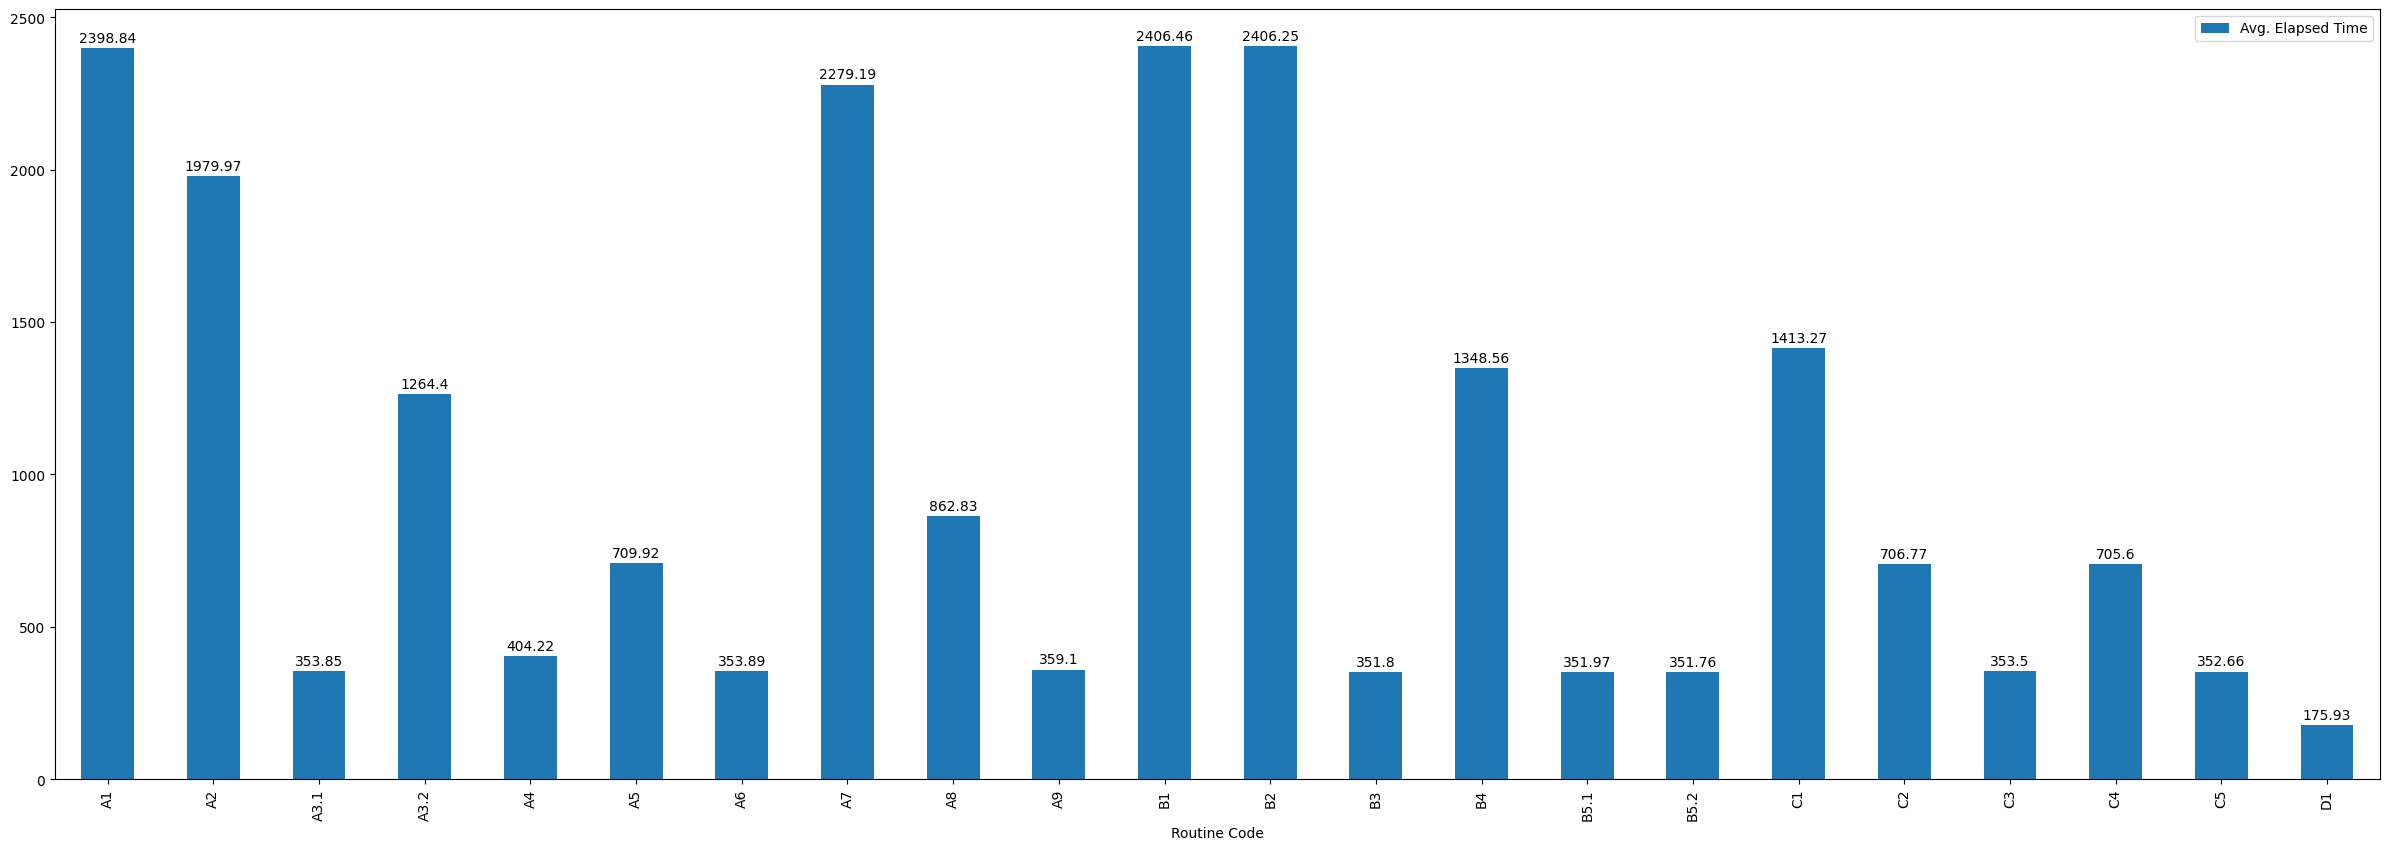

In [20]:
df.plot(kind = 'bar', 
        x = 'Routine Code', 
        y = 'Avg. Elapsed Time', 
        figsize=(30, 10))

for i, v in enumerate(df['Avg. Elapsed Time'].tolist()):
    plt.text(i, v+20, str(round(v, 2)), ha = 'center')

plt.show()

In [21]:
# calculate the total number of records for all routines
routine_totals = dict()

for key in sorted(list(routine_times.keys())):
    routine_totals[key] = len(routine_times[key])
    
routine_totals

{'a1': 6562,
 'a2': 6565,
 'a3.1': 6565,
 'a3.2': 6565,
 'a4': 6562,
 'a5': 6560,
 'a6': 6558,
 'a7': 6551,
 'a8': 6555,
 'a9': 6553,
 'b1': 3254,
 'b2': 3255,
 'b3': 3256,
 'b4': 3256,
 'b5.1': 3252,
 'b5.2': 3252,
 'c1': 3221,
 'c2': 3225,
 'c3': 3225,
 'c4': 3221,
 'c5': 3221,
 'd1': 1}

In [90]:
# calculate transactions per second

# b1 encapsulates all of b
routine_totals['b1']/(sum(routine_times['b1'])/1000)

0.41554799023354344

In [89]:
# c1 encapsulates all of c
routine_totals['c1']/(sum(routine_times['c1'])/1000)

0.7075793452376274

In [88]:
# file uploads 
routine_totals['a1']/(sum(routine_times['a1'])/1000)

0.41686803117518634

In [87]:
# signature upload
routine_totals['a7']/((sum(routine_times['a7'])+sum(routine_times['a5']))/1000)

0.3344376416591173

In [49]:
# calculate the success rate for the document upload routine

# find all document upload routines
import re

document_upload_routine_codes = sorted(list(filter(lambda x: re.match("a.*", x), routine_times.keys())))
document_upload_routine_codes

['a1', 'a2', 'a3.1', 'a3.2', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9']

In [50]:
prev = ""
document_upload_ratios = dict()

for code in document_upload_routine_codes:
    if prev:
        print(f"{prev} to {code}: {len(routine_times[code])} / {len(routine_times[prev])}")
        document_upload_ratios[f"{prev} to {code}"] = len(routine_times[code]) / len(routine_times[prev])
    prev = code
    
document_upload_ratios[f"{document_upload_routine_codes[0]} to {document_upload_routine_codes[-1]}"] = len(routine_times[document_upload_routine_codes[-1]]) / len(routine_times[document_upload_routine_codes[0]]) 
    
document_upload_ratios

a1 to a2: 7006 / 7000
a2 to a3.1: 7008 / 7006
a3.1 to a3.2: 7006 / 7008
a3.2 to a4: 7002 / 7006
a4 to a5: 6998 / 7002
a5 to a6: 6994 / 6998
a6 to a7: 6989 / 6994
a7 to a8: 6990 / 6989
a8 to a9: 6989 / 6990


{'a1 to a2': 1.000857142857143,
 'a2 to a3.1': 1.0002854695974879,
 'a3.1 to a3.2': 0.9997146118721462,
 'a3.2 to a4': 0.9994290608050242,
 'a4 to a5': 0.9994287346472437,
 'a5 to a6': 0.9994284081166047,
 'a6 to a7': 0.9992851015155848,
 'a7 to a8': 1.000143081985978,
 'a8 to a9': 0.999856938483548,
 'a1 to a9': 0.9984285714285714}

In [51]:
document_approval_routine_codes = sorted(list(filter(lambda x: re.match("b.*", x), routine_times.keys())))
document_approval_routine_codes

['b1', 'b2', 'b3', 'b4', 'b5.1', 'b5.2']

In [52]:
prev = ""
document_approval_ratios = dict()

for code in document_approval_routine_codes:
    if prev:
        print(f"{prev} to {code}: {len(routine_times[code])} / {len(routine_times[prev])}")
        document_approval_ratios[f"{prev} to {code}"] = len(routine_times[code]) / len(routine_times[prev])
    prev = code
    
document_approval_ratios[f"{document_approval_routine_codes[0]} to {document_approval_routine_codes[-1]}"] = len(routine_times[document_approval_routine_codes[-1]]) / len(routine_times[document_approval_routine_codes[0]]) 
    
document_approval_ratios

b1 to b2: 3248 / 3248
b2 to b3: 3250 / 3248
b3 to b4: 3248 / 3250
b4 to b5.1: 2912 / 3248
b5.1 to b5.2: 2911 / 2912


{'b1 to b2': 1.0,
 'b2 to b3': 1.000615763546798,
 'b3 to b4': 0.9993846153846154,
 'b4 to b5.1': 0.896551724137931,
 'b5.1 to b5.2': 0.9996565934065934,
 'b1 to b5.2': 0.896243842364532}

In [53]:
document_denial_routine_codes = sorted(list(filter(lambda x: re.match("c.*", x), routine_times.keys())))
document_denial_routine_codes

['c1', 'c2', 'c3', 'c4', 'c5']

In [54]:
prev = ""
document_denial_ratios = dict()

for code in document_denial_routine_codes:
    if prev:
        print(f"{prev} to {code}: {len(routine_times[code])} / {len(routine_times[prev])}")
        document_denial_ratios[f"{prev} to {code}"] = len(routine_times[code]) / len(routine_times[prev])
    prev = code
    
document_denial_ratios[f"{document_denial_routine_codes[0]} to {document_denial_routine_codes[-1]}"] = len(routine_times[document_denial_routine_codes[-1]]) / len(routine_times[document_denial_routine_codes[0]])     

document_denial_ratios

c1 to c2: 3193 / 3190
c2 to c3: 3193 / 3193
c3 to c4: 3190 / 3193
c4 to c5: 3191 / 3190


{'c1 to c2': 1.0009404388714733,
 'c2 to c3': 1.0,
 'c3 to c4': 0.9990604447228312,
 'c4 to c5': 1.0003134796238244,
 'c1 to c5': 1.0003134796238244}